### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 4

Provide answers to the problems in the cells provided.  
The buttons at the top of the page can be used to create
more cells if needed.
The type of cell can be changed from `Code` to `Markdown` (and back).
`Code` cells take (and execute) `python` code.
`Markdown` cells take (and format nicely) text input.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Tuesday at 5pm.

## Setup

This is a `jupyter` notebook.  Find an environment that allows you to work with it.  You can either
install `jupyter` as a python package on your own laptop or PC.  Or you can use a suitable website
on the internet, such as [nbviewer](https://nbviewer.jupyter.org/github/cs4423) and `binder`.

In order to execute the code in a cell,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

The following packages need to be loaded for this notebook to work.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 1.  A Citation Network

The file `scientometrics.net` contains a representation of a network of citations between the $1656$ articles that
appeared from 1978 to 2004 in [Scientometrics](https://en.wikipedia.org/wiki/Scientometrics_(journal)), 
a journal devoted to the field of bibliometrics and the "Science of Science".  It is loaded into a graph `G`
as follows.

In [2]:
E = nx.read_edgelist("scientometrics.net", create_using=nx.DiGraph, nodetype=int)
G = nx.DiGraph()
G.add_nodes_from(range(1, 1656))
G.add_edges_from(E.edges())

`G` as a lot of nodes and even more edges:  **Don't draw** this network.

In [3]:
m, n = G.order(), G.size()
m, n

(1655, 4123)

The file `scientometrics_paper_year.txt` contains, for most but not all articles in the network, 
their year of publication.  It is loaded and stored as node attributes as follows

In [4]:
years = np.loadtxt("scientometrics_paper_year.txt", dtype="int")
for date in years:
    G.nodes[date[0]]['year'] = date[1]

Now most nodes have their publication year as value of the `'year'` key in their attributes dictionary.
For example, node $1113$.

In [5]:
G.nodes[1113]['year']

1999

If the publication year of a node is not known, the normal dictionary access by the key `'year'` will fail
with an error message.  Using the method `get()` instead will return `None` in such a case.

In [6]:
print(G.nodes[4].get('year'))

None


In a directed network, one distinguishes between the **in-degree** and the **out-degree** of a node.
This distinction leads to **two** separate degree distributions.   The out-degree distribution
can be computed as follows.

In [7]:
outs = {}
for (n, d) in G.out_degree():
    outs[d] = outs.get(d, 0) + 1

outs = list(outs.items())
outs.sort()
print(outs)

[(0, 596), (1, 303), (2, 205), (3, 141), (4, 95), (5, 81), (6, 72), (7, 48), (8, 37), (9, 21), (10, 17), (11, 6), (12, 6), (13, 5), (14, 4), (15, 1), (16, 2), (17, 2), (18, 4), (20, 2), (22, 1), (24, 3), (34, 1), (43, 1), (156, 1)]


Excluding the degree $0$ count, a loglog plot of the out-degree frequencies
looks as follows.

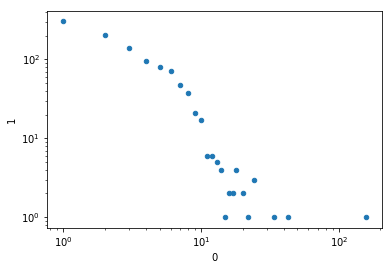

In [8]:
df = pd.DataFrame(outs[1:])
df.plot.scatter(x = 0, y = 1, loglog=True)

Does that look like a power law degree distribution?

* If you were to draw a straight line through the plot, approximating the data points, what
would the slope of that line be, approximately?
* Following the above example, compile a histogram of the in-degrees of the graph `G`,
discard the $0$-degree nodes, and then create a loglog plot of the remaining data points.
* If you were to draw a straight line through the plot, approximating the data points, what
would the slope of that line be, approximately?
* Go back in time and recover the state of the network at the end of $1998$ (as a subgraph `G0`
of `G`).  Then, for articles published from $1999$ onwards, determine the frequency of
articles in `G0` being cited, in relation to their degree in `G0`, and plot
the result in a meaningful way.

(To enable input for the text cell below, highlight the cell and press return.
To typeset the text nicely, and disable input, type SHIFT-return.)

Yes the graph looks like a power law degree distribution. The approx. slope is 19/23.


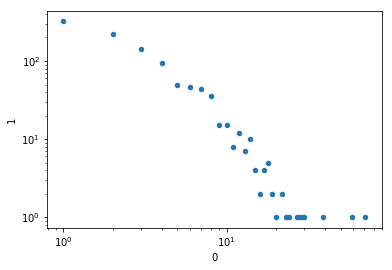

In [9]:
ins = {}
for (n, d) in G.in_degree():
    ins[d] = ins.get(d, 0) + 1

ins = list(ins.items())
ins.sort()
df = pd.DataFrame(ins[1:])
df.plot.scatter(x = 0, y = 1, loglog=True)

The second slope is approximately equal to 1.

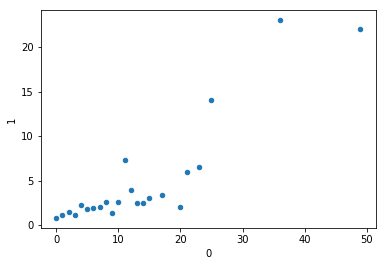

In [10]:
nodes0 = [x for x in G if G.nodes[x].get('year', 0) < 1999]
nodes1 = [x for x in G if G.nodes[x].get('year', 0) >= 1999]

G0 = G.subgraph(nodes0)

for x in G0:
    G0.nodes[x]['citations'] = 0

for x in nodes1:
    for y in G[x]:
        if y in G0:
            G0.nodes[y]['citations'] += 1

max_in0 = max(dict(G0.in_degree()).values())
cd = [0 for d in range(max_in0+1)]
hist = [0 for d in range(max_in0+1)]
for x in G0:
    d = G0.in_degree(x)
    hist[d] += 1
    cd[d] += G0.nodes[x]['citations']

cd = [(i, cd[i]/v) for i, v in enumerate(hist) if v != 0]
pd.DataFrame(cd).plot.scatter(x = 0, y = 1)

### 2. Configuration Model

A configuration model can be produced with the following python program:

In [11]:
from random import shuffle

def stubs_list(a):
    return sum([v * [i] for i, v in enumerate(a)], [])

def configuration(degrees):
    m = sum(degrees) // 2  # size of resulting graph
    stubs = stubs_list(degrees)
    shuffle(stubs)
    G = nx.Graph(zip(stubs[:m], stubs[m:]))
    G.remove_edges_from(G.selfloop_edges())
    return G

In [12]:
dd = [3, 2, 2, 1, 1, 1]
G = configuration(dd)
print(sum(dd)//2, G.size())

5 5


/srv/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


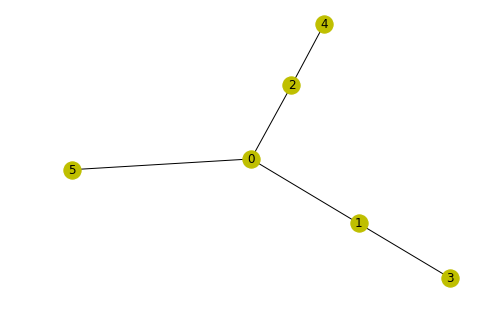

In [13]:
nx.draw(G, with_labels=True, node_color = 'y')

In order to produce a **degree sequence** for $n$ nodes from a given
**degree distribution** $(p_k)$,
we need to draw $n$ items from the discrete
distribution $(p_k)$.  This functionality is provided by the  `numpy` function `random.choice`.

In [14]:
from numpy.random import choice

For example, to pick $4$ from $(0,1,\dotsc,5)$ where $5$ is $5$ times more likely than the other values:

In [15]:
sorted(choice(range(6), 4, p=5*[0.1] + [0.5]))

[0, 5, 5, 5]

The $3$ arguments to the `choice` call are
* a list of objects to be picked from (here $(0,1,\dotsc,5)$ represented as `range(6)`),
* the number $n$ of objects to be picked (here $n = 4$),
* and the list of discrete probabilities as a parameter with key `p`
(here it is $(0.1, 0.1, 0.1, 0.1, 0.1, 0.5)$).

`sorted` is used to convert the result into a proper list,
with values sorted increasingly.
Note how this can produce repreatedly selected numbers.

* Construct a **discrete probability distribution** $(p_k)$ of length $100$, say,
  with $p_0 = 0$, $p_1$ relatively small, and such that $p_k$ follows a power law
  with exponent $\gamma = 2$ otherwise; make sure that $\sum_{k=0}^{99} = 1$.
* Use the above `choice` function to produce a **degree sequence** of length
  $5000$, say, with degree distribution $(p_k)$.
* Use the above function `configuation` to produce a **random network** `C` with that 
  degree sequence.
* How many nodes and edges do you expect, how many nodes and edges does the graph
  `C` actually have?
* In `networkx`, a configuration model can be generated with the function 
  `nx.configuration_model(degrees)`.  Apply this function to the same degree
  sequence to obtain a random network `D`.   How many nodes and edges does
  the graph `D` have?
  
(If $n = 5000$ turns out to be to large, use a smaller number of nodes.)

[0.15, 0.0375, 0.016666666666666666, 0.009375, 0.006, 0.004166666666666667, 0.003061224489795918, 0.00234375, 0.0018518518518518517, 0.0015, 0.0012396694214876034, 0.0010416666666666667, 0.0008875739644970414, 0.0007653061224489796, 0.0006666666666666666, 0.0005859375, 0.0005190311418685121, 0.0004629629629629629, 0.0004155124653739612, 0.000375, 0.0003401360544217687, 0.00030991735537190085, 0.00028355387523629487, 0.00026041666666666666, 0.00024, 0.00022189349112426034, 0.00020576131687242795, 0.0001913265306122449, 0.00017835909631391198, 0.00016666666666666666, 0.00015608740894901147, 0.000146484375, 0.0001377410468319559, 0.00012975778546712804, 0.00012244897959183673, 0.00011574074074074073, 0.0001095690284879474, 0.0001038781163434903, 9.861932938856015e-05, 9.375e-05, 8.92325996430696e-05, 8.503401360544217e-05, 8.112493239588967e-05, 7.747933884297521e-05, 7.407407407407407e-05, 7.088846880907372e-05, 6.79040289723857e-05, 6.510416666666667e-05, 6.247396917950854e-05, 6e-05, 5

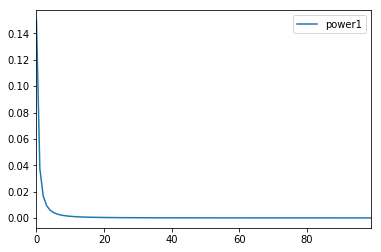

In [16]:

df1 = pd.DataFrame()
def power_dist(c, gamma, k):
    return c * k**(-gamma)
mm=100
c = 0.15
po1 = [power_dist(c, 2, k) for k in range(1,mm+1)]
print(po1)
df1['power1'] = po1

df1.plot()



In [17]:
gamma = 2
c = 2
p = [0] + [c * k**(-gamma) for k in range(1,100)]
p[1] = p[1] - (sum(p) - 1)
print(p)
print(sum(p))

#sorted(choice(range(6), 5000, p=[0] + [c * k**(-gamma) for k in range(1,100)]))

[0, -0.26976780036978454, 0.5, 0.2222222222222222, 0.125, 0.08, 0.05555555555555555, 0.04081632653061224, 0.03125, 0.024691358024691357, 0.02, 0.01652892561983471, 0.013888888888888888, 0.011834319526627219, 0.01020408163265306, 0.008888888888888889, 0.0078125, 0.006920415224913495, 0.006172839506172839, 0.00554016620498615, 0.005, 0.0045351473922902496, 0.004132231404958678, 0.003780718336483932, 0.003472222222222222, 0.0032, 0.0029585798816568047, 0.0027434842249657062, 0.002551020408163265, 0.0023781212841854932, 0.0022222222222222222, 0.002081165452653486, 0.001953125, 0.0018365472910927456, 0.0017301038062283738, 0.0016326530612244899, 0.0015432098765432098, 0.0014609203798392988, 0.0013850415512465374, 0.0013149243918474688, 0.00125, 0.001189767995240928, 0.0011337868480725624, 0.001081665765278529, 0.0010330578512396695, 0.0009876543209876543, 0.000945179584120983, 0.0009053870529651426, 0.0008680555555555555, 0.0008329862557267805, 0.0008, 0.0007689350249903883, 0.0007396449704

### 3. Preferential Linear Attachment

The following algorithm, introduced and named after Barabási-Albert, **grows** a network 
from a complete graph on $a$ nodes, by
adding one node at a time, together with $b$ new edges, linking the new node to 
$b$ old nodes, with a probability given by their current degrees:

An $(n, a, b)$**-BA model** is a (simple) graph on $n$ nodes, constructed as follows.
1. start with a complete graph on $a$ nodes (at time $t = 0$)
2. for $t = 1, \dots, n-a-1$:
    * add new node $x = a + t$
    * and $b$ links to old nodes with probability 
      $$
      p_{x \to i} = \frac{k_{i, t-1}}{2 m_{t-1}},
      $$
      where $k_{i,t}$ is the degree of node $i$ at time $t$ and $m_t$ is the
      number of edges at time $t$.

For an implementation of this algorithm, we need to be able to draw $m$ **distinct** items from the discrete
distribution $(p_{x\to i})_i$.  This functionality is also provided by the  `numpy` function `random.choice`,
by setting an additional keyword parameter `replace` to `False`.

In [18]:
from numpy.random import choice

In [19]:
sorted(choice(range(6), 4, p=5*[0.1] + [0.5], replace=False))

[0, 3, 4, 5]

No we are ready to grow a graph.  Let's set $a = 3$ and $b = 2$ for starters.

In [20]:
a, b = 3, 2

In [21]:
G = nx.complete_graph(a)
G.degree()

DegreeView({0: 2, 1: 2, 2: 2})

In [22]:
x, m = G.order(), G.size()
x, m

(3, 3)

Compute a discrete probabilty distribution corresponding to node degrees.

In [23]:
prob = [d/(2*m) for n, d in G.degree()]
prob

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

Select $b$ distinct nodes from the old graph according to the probabilities `prob`

In [24]:
old = sorted(choice(G.nodes(), b, p=prob, replace = False))
old

[1, 2]

Add edges from a new node `x` to the selected nodes.

In [25]:
G.add_edges_from([(x, o) for o in old])

Draw the resulting graph.

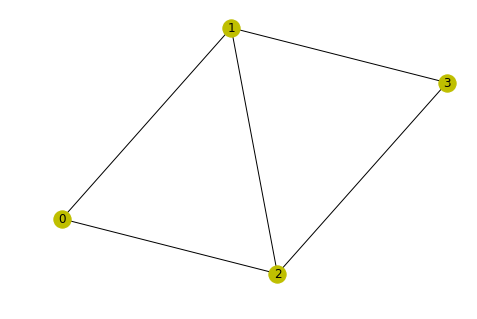

In [26]:
nx.draw(G, with_labels=True, node_color='y')

For the next node, all of the previous steps are repeated.

In [27]:
x, m  = G.order(), G.size()
prob = [d/(2*m) for n, d in G.degree()]
old = sorted(choice(G.nodes(), b, p=prob, replace = False))
G.add_edges_from([(x, o) for o in old])

And again, we can draw the resulting graph.

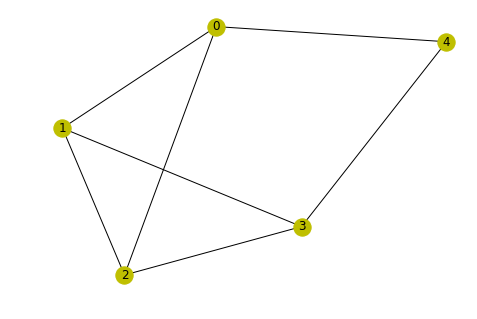

In [28]:
nx.draw(G, with_labels=True, node_color='y')

And so on ...

* Add 20 more nodes to the graph `G` by repeating the above steps
  and draw the resulting graph.
* Add 250 more nodes to the graph `G` by repeating the above steps
  (preferrably with a python `for` loop, rather than typing out 250 identical pieces of code.)
* Compute the graph clustering coefficient $C$ and the characteristic path length $L$ of `G`.
  How do these values compare to ER-random graphs of similar size?
* Create a loglog plot of the degree histogram of the final version of `G`: does this
  indicate a power law distribution?  If so, what is the exponent $\gamma$?
* In `networkx`, a BA-model can be generated with the function
  `nx.barabasi_albert_graph(n, b)` (where $a = b$ in terms of our parameters, and the initial
  graph is an **empty** graph on $a$ nodes).  Use this function to generate a graph `B`
  comparable to `G` above, and check whether its degree distribution follows a power law.

In [29]:
for i in range(0,19):
    x, m  = G.order(), G.size()
    prob = [d/(2*m) for n, d in G.degree()]
    old = sorted(choice(G.nodes(), b, p=prob, replace = False))
    G.add_edges_from([(x, o) for o in old])
    
for i in range(0,250):
    x, m  = G.order(), G.size()
    prob = [d/(2*m) for n, d in G.degree()]
    old = sorted(choice(G.nodes(), b, p=prob, replace = False))
    G.add_edges_from([(x, o) for o in old])


print(nx.average_clustering(G))


print(nx.average_shortest_path_length(G))
from math import log
kbar = sum(dict(G.degree()).values()) / n
log(n) / log(kbar)

0.07267815654298779
3.431753161680169


-17.74698888786265

### 4. Course Summary

* In your own words, summarize the contents of the course.  What is Network Science?  Which parts are covered in the course, which are missing?  Use complete sentences.  Write approximately 100 words.

To me this course is about modelling complex systems and interactions as networks (essentially just edges and vertices). This modelling technique allows us to perform analysis of the modelled networks and make observations on large amounts of data. We made extensive use of the networkx package in Python, which was pretty intuitive as I'm quite familiar with python at this stage in college. Networks Science studies complex networks and performs analysis on them.

We covered most network properties such as: density, size, clustering coefficient, shortest path length etc. We also looked at different kinds of networks such as social networks, randomnly generated graphs, bipartite graphs, configuration models etc. We finished up looking at power laws as well. 